#### Point of this notebook is to add **filament parameters** to the gama galaxy dataframe / catalog

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import seaborn as sns

In [2]:
#show all columns
pd.set_option('display.max_columns', None)
# open gamagals pickle dataframe 
f = open('/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Pickles/gamagals_complete2.pkl', 'rb')
gamagals = pickle.load(f)

In [3]:
gamagals 

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID
0,6802,174.00600,0.72093,0.05054,0.051814,9.076030,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0
1,6806,174.02279,0.70594,0.33124,0.332854,10.979200,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0
2,6808,174.10071,0.65891,0.22936,0.230851,10.791600,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0
3,6810,174.10908,0.80390,0.32630,0.327908,11.119700,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0
4,6816,174.01896,0.66580,0.07641,0.077715,9.012390,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.410600,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0
113154,4322179,220.18208,1.03991,0.22929,0.230207,9.689020,0.164714,GAMAJ144043.70+010223.6,3,9.72107,0.224629,9.72024,0.234005,0.009294,0.008911,0.136334,0.102135,9.21383,0.364115,0.715062,0.140028,NaN,NaN,NaN,NaN,NaN,NaN,-687.527336,-580.637147,16.334981,3.542033,28.007625,3834.0
113155,4327264,215.73183,1.66110,0.00006,0.000001,0.464692,0.168939,GAMAJ142255.63+013939.9,4,9.71634,0.281623,9.78669,0.182227,0.023386,0.013982,0.630618,0.102306,9.11150,0.391299,1.697990,0.115559,NaN,NaN,NaN,NaN,NaN,NaN,-0.215265,-0.154865,0.007690,0.008423,0.132739,2256.0
113156,4327642,222.77558,1.53559,0.00034,0.000004,1.253310,0.103429,GAMAJ145106.13+013208.1,4,9.95121,0.140083,9.13723,0.460909,0.004885,0.003892,0.116297,0.094622,9.82587,0.198782,1.111890,0.050442,NaN,NaN,NaN,NaN,NaN,NaN,-1.102929,-1.020451,0.040281,0.043634,0.892363,254.0


In [4]:
# open filament branches pickle dataframe 
f = open('/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Pickles/filamentIDbranches_df.pkl', 'rb')
fbranches = pickle.load(f)

In [5]:
# perhaps we can use this to calculate lenght 
fbranches

,px,py,pz,px2,py2,pz2,Filament ID
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0
...,...,...,...,...,...,...,...
3,-443.991,-317.901,-16.19660,-443.361,-318.762,-15.77110,7338
0,-775.965,645.095,-26.83350,-773.344,646.519,-23.22260,7339
1,-773.344,646.519,-23.22260,-770.871,648.032,-20.45670,7339
2,-770.871,648.032,-20.45670,-768.352,649.882,-18.76000,7339


In [6]:
fb = np.array(fbranches)
fb[0][:3] #px py pz

array([-474.964  , -316.167  ,   -3.36726])

In [7]:
fb[0][3:-1] #px2, py2, pz2

array([-474.767  , -315.979  ,   -3.45685])

In [8]:
fb[0][-1] #filament ID 

0.0

In [9]:
len(fb)

36307

In [10]:
fb.shape

(36307, 7)

In [11]:
fbranches[fbranches['Filament ID'] == 0]

,px,py,pz,px2,py2,pz2,Filament ID
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0
5,-473.134,-314.627,-4.05447,-472.599,-314.468,-4.00552,0
6,-472.599,-314.468,-4.00552,-472.030,-314.457,-4.09359,0
7,-472.030,-314.457,-4.09359,-471.540,-314.443,-4.35966,0
8,-471.540,-314.443,-4.35966,-471.277,-314.141,-4.51730,0
9,-471.277,-314.141,-4.51730,-471.107,-313.561,-4.32858,0


In [12]:
fbranches

,px,py,pz,px2,py2,pz2,Filament ID
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0
...,...,...,...,...,...,...,...
3,-443.991,-317.901,-16.19660,-443.361,-318.762,-15.77110,7338
0,-775.965,645.095,-26.83350,-773.344,646.519,-23.22260,7339
1,-773.344,646.519,-23.22260,-770.871,648.032,-20.45670,7339
2,-770.871,648.032,-20.45670,-768.352,649.882,-18.76000,7339


In [13]:
fb[0] # first filament        

array([-474.964  , -316.167  ,   -3.36726, -474.767  , -315.979  ,
         -3.45685,    0.     ])

In [14]:
fb[0][:3] #px py pz

array([-474.964  , -316.167  ,   -3.36726])

In [15]:
fb[0][3:-1] #px2, py2, pz2

array([-474.767  , -315.979  ,   -3.45685])

In [16]:
fb[1][-1] #filament ID

0.0

In [17]:
fb.shape

(36307, 7)

In [18]:
len(fb)

36307

In [19]:
filament_ids = np.array(fbranches["Filament ID"])
unique_ids = np.unique(filament_ids)
unique_ids #unique filament IDs 

array([   0,    1,    2, ..., 7337, 7338, 7339])

In [20]:
unique_ids.shape #how many unique filaments there are

(7340,)

In [21]:
### array with only distance/length values of each segment; no ID stored 
N = len(fb)
new_fb = np.zeros(N)

for i in range(N):
    new_fb[i] = np.linalg.norm((fb[i][:3]) - (fb[i][3:-1]))

new_fb

array([0.28666944, 0.50462331, 0.62249938, ..., 4.00688168, 3.55621314,
       3.81448339])

In [22]:
print(new_fb.shape, "\n", fb.shape)

(36307,) 
 (36307, 7)


In [23]:
#check that the distance values are correct 
np.linalg.norm((fb[0][:3]) - (fb[0][3:-1])) # voila

0.28666944047107057

In [24]:
filament_ids.shape

(36307,)

In [25]:
# now we have array of ONE value for distance between segements
# and an array of equal size for the filament IDs 
filament_ids 

array([   0,    0,    0, ..., 7339, 7339, 7339])

In [26]:
# do a retro mask loop thing? 
retro_mask = np.where(filament_ids==0)
retro_mask # voila! 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [27]:
new_fb[retro_mask]

array([0.28666944, 0.50462331, 0.62249938, 0.579801  , 0.5628016 ,
       0.56026967, 0.57588048, 0.55775375, 0.43037585, 0.63317868,
       0.75325946, 0.73983177, 0.7937229 , 0.69706408, 0.54358812,
       0.57154214, 0.65794932, 0.7570783 , 0.72174444, 0.61882328,
       0.60006761, 0.95418119, 1.561747  , 2.29279137, 2.8982503 ,
       3.00527441, 3.1070427 , 3.67711198])

In [28]:
np.sum(new_fb[retro_mask])

30.264923511358006

In [29]:
M = len(unique_ids)
filament_lengths = np.zeros(M)
filament_lengths.shape

(7340,)

In [30]:
new_fb[0]

0.28666944047107057

In [31]:
# loops over unique IDs and checks if filament lengths array for each segment is same as iterator (i)
# assumes we already have an array of segment distances (here its called "new_fb")
M = len(unique_ids) # length of unique ids, from 0 to 7340

filament_lengths = np.zeros(M)

for i in range(M): 
    retro_mask = np.where(filament_ids == i)  # masks entire filament length array by filament ID (which should == iterator step)
    filament_lengths[i] = np.sum(new_fb[retro_mask]) # sums all of the non-masked values from iterator check, saves to i-th value of new array
    
filament_lengths

array([30.26492351,  0.86385825,  9.54555696, ...,  6.05452464,
        4.15371368, 16.06116827])

In [32]:
#filament lengths should match shaoe of unique id
print(filament_lengths.shape, "\n", unique_ids.shape) # voila

(7340,) 
 (7340,)


(array([4.679e+03, 1.912e+03, 5.070e+02, 1.630e+02, 3.500e+01, 2.700e+01,
        8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([8.19404571e-03, 1.41045865e+01, 2.82009789e+01, 4.22973713e+01,
        5.63937637e+01, 7.04901562e+01, 8.45865486e+01, 9.86829410e+01,
        1.12779333e+02, 1.26875726e+02, 1.40972118e+02]),
 <BarContainer object of 10 artists>)

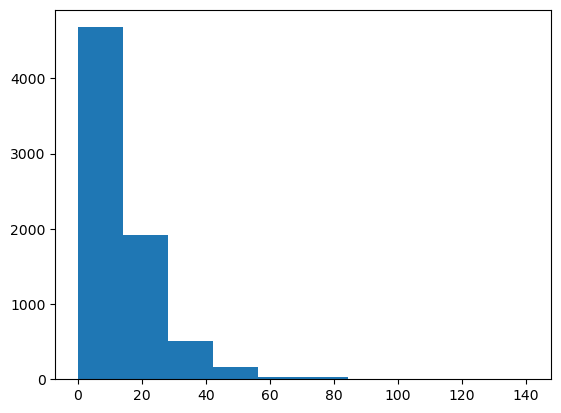

In [33]:
plt.hist(filament_lengths)

Text(0.5, 1.0, 'Filament Lengths')

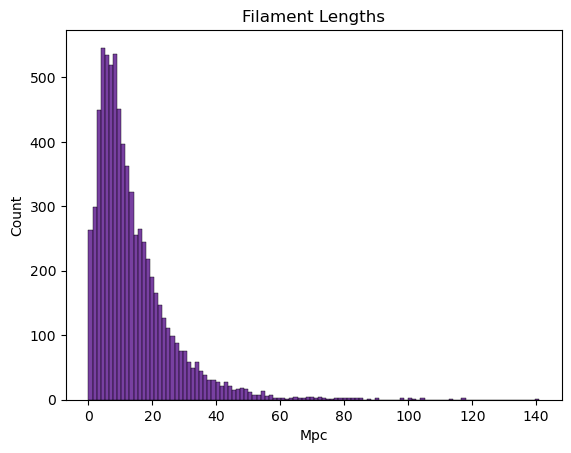

In [61]:
sns.histplot(filament_lengths, color = 'indigo')
plt.xlabel('Mpc')
plt.title('Filament Lengths')

#### Now want to save this to original gama dataframe

In [35]:
fbranches

,px,py,pz,px2,py2,pz2,Filament ID
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0
...,...,...,...,...,...,...,...
3,-443.991,-317.901,-16.19660,-443.361,-318.762,-15.77110,7338
0,-775.965,645.095,-26.83350,-773.344,646.519,-23.22260,7339
1,-773.344,646.519,-23.22260,-770.871,648.032,-20.45670,7339
2,-770.871,648.032,-20.45670,-768.352,649.882,-18.76000,7339


In [36]:
filament_lengths.shape

(7340,)

In [37]:
filament_lengths[0]

30.264923511358006

#### Need to append 7340 filament lengths to the unique filament IDs (and there are 36,000 instances)

In [38]:
unique_ids

array([   0,    1,    2, ..., 7337, 7338, 7339])

In [39]:
filament_ids # full array of repeating filament IDs (from dataframe)

array([   0,    0,    0, ..., 7339, 7339, 7339])

In [40]:
filament_lengths

array([30.26492351,  0.86385825,  9.54555696, ...,  6.05452464,
        4.15371368, 16.06116827])

In [41]:
fb # array of all segments and ids

array([[-4.74964e+02, -3.16167e+02, -3.36726e+00, ..., -3.15979e+02,
        -3.45685e+00,  0.00000e+00],
       [-4.74767e+02, -3.15979e+02, -3.45685e+00, ..., -3.15625e+02,
        -3.66815e+00,  0.00000e+00],
       [-4.74476e+02, -3.15625e+02, -3.66815e+00, ..., -3.15196e+02,
        -3.91581e+00,  0.00000e+00],
       ...,
       [-7.73344e+02,  6.46519e+02, -2.32226e+01, ...,  6.48032e+02,
        -2.04567e+01,  7.33900e+03],
       [-7.70871e+02,  6.48032e+02, -2.04567e+01, ...,  6.49882e+02,
        -1.87600e+01,  7.33900e+03],
       [-7.68352e+02,  6.49882e+02, -1.87600e+01, ...,  6.51824e+02,
        -1.71284e+01,  7.33900e+03]])

In [42]:
filament_ids #array of JUST filament IDs corresponding to each segment --> this is all we need to append lengths to 

array([   0,    0,    0, ..., 7339, 7339, 7339])

In [43]:
filament_ids.shape

(36307,)

In [44]:
filament_lengths.shape

(7340,)

In [45]:
M = len(filament_ids) #36000
M2 = len(filament_lengths) # 7340

all_filament_lengths = np.zeros(M)

for i in range(M2): 
    mask2 = np.where(filament_ids == i)
    all_filament_lengths[mask2] = filament_lengths[i]

all_filament_lengths

array([30.26492351, 30.26492351, 30.26492351, ..., 16.06116827,
       16.06116827, 16.06116827])

In [46]:
all_filament_lengths.shape

(36307,)

In [47]:
fbranches

,px,py,pz,px2,py2,pz2,Filament ID
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0
...,...,...,...,...,...,...,...
3,-443.991,-317.901,-16.19660,-443.361,-318.762,-15.77110,7338
0,-775.965,645.095,-26.83350,-773.344,646.519,-23.22260,7339
1,-773.344,646.519,-23.22260,-770.871,648.032,-20.45670,7339
2,-770.871,648.032,-20.45670,-768.352,649.882,-18.76000,7339


In [48]:
fbranches['Fil Length'] = all_filament_lengths
fbranches 

,px,py,pz,px2,py2,pz2,Filament ID,Fil Length
0,-474.964,-316.167,-3.36726,-474.767,-315.979,-3.45685,0,30.264924
1,-474.767,-315.979,-3.45685,-474.476,-315.625,-3.66815,0,30.264924
2,-474.476,-315.625,-3.66815,-474.099,-315.196,-3.91581,0,30.264924
3,-474.099,-315.196,-3.91581,-473.644,-314.865,-4.05575,0,30.264924
4,-473.644,-314.865,-4.05575,-473.134,-314.627,-4.05447,0,30.264924
...,...,...,...,...,...,...,...,...
3,-443.991,-317.901,-16.19660,-443.361,-318.762,-15.77110,7338,4.153714
0,-775.965,645.095,-26.83350,-773.344,646.519,-23.22260,7339,16.061168
1,-773.344,646.519,-23.22260,-770.871,648.032,-20.45670,7339,16.061168
2,-770.871,648.032,-20.45670,-768.352,649.882,-18.76000,7339,16.061168


In [49]:
gamagals

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID
0,6802,174.00600,0.72093,0.05054,0.051814,9.076030,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0
1,6806,174.02279,0.70594,0.33124,0.332854,10.979200,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0
2,6808,174.10071,0.65891,0.22936,0.230851,10.791600,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0
3,6810,174.10908,0.80390,0.32630,0.327908,11.119700,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0
4,6816,174.01896,0.66580,0.07641,0.077715,9.012390,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.410600,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0
113154,4322179,220.18208,1.03991,0.22929,0.230207,9.689020,0.164714,GAMAJ144043.70+010223.6,3,9.72107,0.224629,9.72024,0.234005,0.009294,0.008911,0.136334,0.102135,9.21383,0.364115,0.715062,0.140028,NaN,NaN,NaN,NaN,NaN,NaN,-687.527336,-580.637147,16.334981,3.542033,28.007625,3834.0
113155,4327264,215.73183,1.66110,0.00006,0.000001,0.464692,0.168939,GAMAJ142255.63+013939.9,4,9.71634,0.281623,9.78669,0.182227,0.023386,0.013982,0.630618,0.102306,9.11150,0.391299,1.697990,0.115559,NaN,NaN,NaN,NaN,NaN,NaN,-0.215265,-0.154865,0.007690,0.008423,0.132739,2256.0
113156,4327642,222.77558,1.53559,0.00034,0.000004,1.253310,0.103429,GAMAJ145106.13+013208.1,4,9.95121,0.140083,9.13723,0.460909,0.004885,0.003892,0.116297,0.094622,9.82587,0.198782,1.111890,0.050442,NaN,NaN,NaN,NaN,NaN,NaN,-1.102929,-1.020451,0.040281,0.043634,0.892363,254.0


### Now have to do this for large gama gal catalog which **already has** fil_id

In [50]:
f_ids = np.array(gamagals['Fil_ID'])
print(f_ids, "\n\n", f_ids.shape)

[ 383. 3444. 4604. ... 2256.  254. 5820.] 

 (113158,)


In [51]:
# can use filament lengths array for just unique values 
# index of this corresponds to what the length for that filament ID is 
print(filament_lengths, "\n\n", filament_lengths.shape)

[30.26492351  0.86385825  9.54555696 ...  6.05452464  4.15371368
 16.06116827] 

 (7340,)


In [52]:
M = len(f_ids) # filament ids from gamagals catalog 
N = len(filament_lengths) #7340 unique ones 

catalog_lengths = np.zeros(M) # should be same size as array of gama catalog

for i in range(N): 
    mask3 = np.where(f_ids == i)
    catalog_lengths[mask3] = filament_lengths[i]

catalog_lengths

array([ 9.57657223, 15.53526316, 17.17352937, ...,  0.03272901,
        0.30050892,  5.54029233])

In [53]:
catalog_lengths.shape # voila

(113158,)

In [54]:
catalog_lengths

array([ 9.57657223, 15.53526316, 17.17352937, ...,  0.03272901,
        0.30050892,  5.54029233])

In [55]:
# test this is right -- first fil ID from gamagals catalog is 383
f_ids[0]

383.0

In [56]:
# which should correspond to 383-rd index of filament lengths array 
filament_lengths[383]

9.576572229544968

In [57]:
catalog_lengths[0] # voila 

9.576572229544968

In [58]:
gamagals['Fil Length'] = catalog_lengths

In [59]:
gamagals

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID,Fil Length
0,6802,174.00600,0.72093,0.05054,0.051814,9.076030,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0,9.576572
1,6806,174.02279,0.70594,0.33124,0.332854,10.979200,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0,15.535263
2,6808,174.10071,0.65891,0.22936,0.230851,10.791600,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0,17.173529
3,6810,174.10908,0.80390,0.32630,0.327908,11.119700,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0,24.703361
4,6816,174.01896,0.66580,0.07641,0.077715,9.012390,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0,9.504916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.410600,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0,13.665752
113154,4322179,220.18208,1.03991,0.22929,0.230207,9.689020,0.164714,GAMAJ144043.70+010223.6,3,9.72107,0.224629,9.72024,0.234005,0.009294,0.008911,0.136334,0.102135,9.21383,0.364115,0.715062,0.140028,NaN,NaN,NaN,NaN,NaN,NaN,-687.527336,-580.637147,16.334981,3.542033,28.007625,3834.0,7.730034
113155,4327264,215.73183,1.66110,0.00006,0.000001,0.464692,0.168939,GAMAJ142255.63+013939.9,4,9.71634,0.281623,9.78669,0.182227,0.023386,0.013982,0.630618,0.102306,9.11150,0.391299,1.697990,0.115559,NaN,NaN,NaN,NaN,NaN,NaN,-0.215265,-0.154865,0.007690,0.008423,0.132739,2256.0,0.032729
113156,4327642,222.77558,1.53559,0.00034,0.000004,1.253310,0.103429,GAMAJ145106.13+013208.1,4,9.95121,0.140083,9.13723,0.460909,0.004885,0.003892,0.116297,0.094622,9.82587,0.198782,1.111890,0.050442,NaN,NaN,NaN,NaN,NaN,NaN,-1.102929,-1.020451,0.040281,0.043634,0.892363,254.0,0.300509


### Save as pickle

In [60]:
# gamagals.to_pickle('/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Pickles/./gamagals_complete3.pkl')